In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family'] = 'Meiryo'


In [4]:
df = pd.read_csv('../Data/Tmp/fixed_merged.csv', 
                 encoding='utf-8', 
                 sep=',', 
                 dtype=str)
df.head()


,reg_num,app_year_month_day,set_reg_year_month_day,right_person_addr,ipc,right_person_name
0,5684381,20110708,20150123,ドイツ連邦共和国,G01S 5/14,フラウンホツフアーーゲゼルシヤフトツアーフエーデルングデアアンゲバンテンフオルシユングエーフアー
1,5684381,20110708,20150123,ドイツ連邦共和国,G01S 5/14,フリードリツヒーアレクサンダーーユニバーシタツタエルランゲンーニユルンベルク
2,5684399,20120209,20150123,アメリカ合衆国,B26B 21/52,ザジレツトカンパニーリミテツドライアビリテイカンパニー
3,5684492,20100512,20150123,東京都渋谷区,G10H 3/18,ＤＲＣ合同会社
4,5684500,20100623,20150123,アメリカ合衆国,C08G 65/26,バイエル・マテリアルサイエンス・リミテツド・ライアビリテイ・カンパニー


In [11]:
df['app_year_month'] = df['app_year_month_day'].str[:6]
df['app_year'] = np.where(df['app_year_month'].str[-2:].isin(['01', '02', '03']), 
                          df['app_year_month'].str[:4].astype(np.float64) - 1, 
                          df['app_year_month'].str[:4].astype(np.float64))
df['reg_year_month'] = df['set_reg_year_month_day'].str[:6]
df['reg_year'] = np.where(df['reg_year_month'].str[-2:].isin(['01', '02', '03']), 
                          df['reg_year_month'].str[:4].astype(np.float64) - 1, 
                          df['reg_year_month'].str[:4].astype(np.float64))
df = df.drop(columns=['app_year_month_day', 'set_reg_year_month_day', 'reg_year_month', 'app_year_month'])
df


,reg_num,right_person_addr,ipc,right_person_name,app_year,reg_year
0,5684381,ドイツ連邦共和国,G01S 5/14,フラウンホツフアーーゲゼルシヤフトツアーフエーデルングデアアンゲバンテンフオルシユングエーフアー,2011.0,2014.0
1,5684381,ドイツ連邦共和国,G01S 5/14,フリードリツヒーアレクサンダーーユニバーシタツタエルランゲンーニユルンベルク,2011.0,2014.0
2,5684399,アメリカ合衆国,B26B 21/52,ザジレツトカンパニーリミテツドライアビリテイカンパニー,2011.0,2014.0
3,5684492,東京都渋谷区,G10H 3/18,ＤＲＣ合同会社,2010.0,2014.0
4,5684500,アメリカ合衆国,C08G 65/26,バイエル・マテリアルサイエンス・リミテツド・ライアビリテイ・カンパニー,2010.0,2014.0
...,...,...,...,...,...,...
7327089,7146146,東京都千代田区,G01B 11/00,三菱電機株式会社,2020.0,2022.0
7327090,7146149,東京都千代田区,F02M 26/67,三菱電機株式会社,2020.0,2022.0
7327091,7146150,東京都千代田区,H04B 7/06,三菱電機株式会社,2020.0,2022.0
7327092,7146151,東京都千代田区,H04B 7/024,三菱電機株式会社,2020.0,2022.0


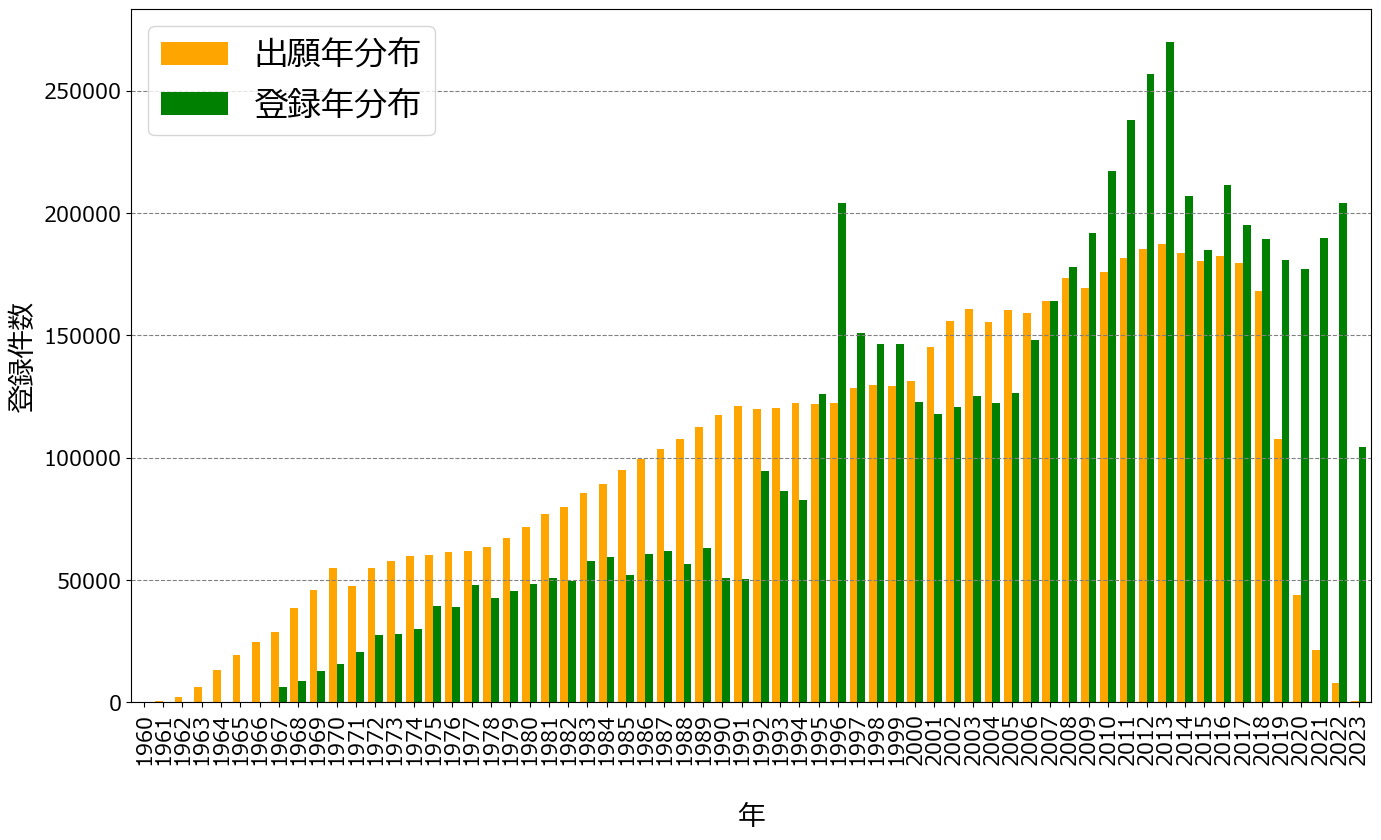

In [16]:
# 出願年基準と登録年基準どっちが良いか
# samp_a = adate_jp_df.groupby(['app_year', 'reg_num'])['right_person_name'].count().reset_index(drop=False).copy()
# samp_a = samp_a[['app_year', 'reg_num']].groupby('app_year').count()
samp_a = df[df['app_year'].notna()].copy()
samp_a['app_year'] = samp_a['app_year'].astype(np.int64)
samp_a = samp_a.groupby('app_year')[['reg_num']].nunique().copy()
# samp_a = adate_jp_df[adate_jp_df['app_year'].isin([str(y) for y in range(1971, 2015+1)])].groupby('app_year')[['reg_num']].nunique().copy()

# samp_r = rdate_jp_df.groupby(['reg_year', 'reg_num'])['right_person_name'].nunique().reset_index(drop=False).copy()
# samp_r = samp_r[['reg_year', 'reg_num']].groupby('reg_year').count()
samp_r = df[df['reg_year'].notna()].copy()
samp_r['reg_year'] = samp_r['reg_year'].astype(np.int64)
samp_r = samp_r.groupby('reg_year')[['reg_num']].nunique().copy()
# samp_r = rdate_jp_df[rdate_jp_df['reg_year'].isin([str(y) for y in range(1971, 2015+1)])].groupby('reg_year')[['reg_num']].nunique().copy()

pd.concat([samp_a.rename(columns={'reg_num':'出願年分布'}), 
           samp_r.rename(columns={'reg_num':'登録年分布'})], axis=1).plot(kind='bar', 
                                                                     figsize=(16, 9), 
                                                                     legend=True, 
                                                                     color=['orange', 'green'], 
                                                                     fontsize=15, 
                                                                     width=0.8)
plt.grid(axis='y', color='gray', linestyle='--')
plt.legend(fontsize=24, loc='upper left')
plt.xlabel('\n年', fontsize=20)
plt.ylabel('登録件数', fontsize=20)
# plt.title('出願年分布と登録年分布\n', fontsize=20)
plt.show()


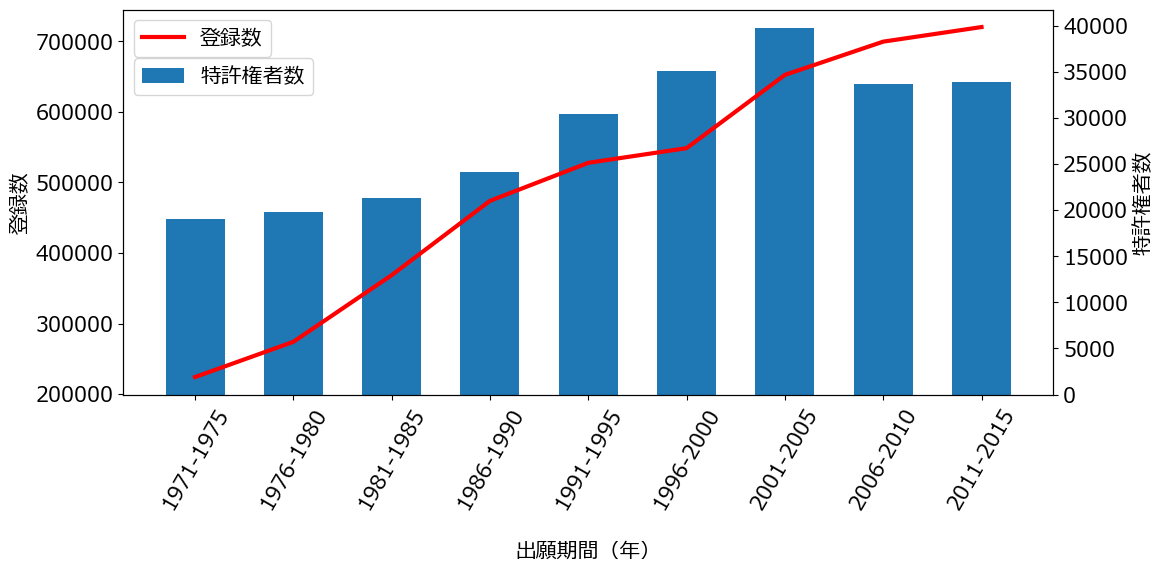

In [11]:
period_num_df = pd.DataFrame(period_num_dict)#.to_csv('../ProcessingData/Fixed/period_num.csv', sep=',', encoding='utf-8', index=False)
# Me:reg_numとright_person_nameのperiodごとの推移を表す二軸グラフを作成する

x = period_num_df['period']
y1 = period_num_df['reg_num'] #折れ線グラフ用データ
y2 = period_num_df['right_person_name'] #棒グラフ用データ

#第一軸(ax1)と第二軸(ax2)を作って関連付ける
fig, ax1 = plt.subplots(figsize=(12, 5))
ax2 = ax1.twinx()

#第一軸を折れ線グラフ、第二軸を棒グラフに
ax1.plot(x, y1, linewidth=3, color="red", linestyle="solid", label='登録数')
ax2.bar(x, y2, width=0.6, label='特許権者数')

#y軸の範囲 今回は第二軸のみとした
# ax2.set_ylim([0,300])

#重ね順として折れ線グラフを前面に。
#そうしないと棒グラフに折れ線が隠れてしまうので。
ax1.set_zorder(2)
ax2.set_zorder(1)

#折れ線グラフの背景を透明に。
#そうしないと重ね順が後ろに回った棒グラフが消えてしまう。
ax1.patch.set_alpha(0)

#凡例を表示（グラフ左上、ax2をax1のやや下に持っていく）
ax1.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0.5, fontsize=15)
ax2.legend(bbox_to_anchor=(0, 0.9), loc='upper left', borderaxespad=0.5, fontsize=15)

#グリッド表示(ax1のみ)
# ax1.grid(True)

#軸ラベルを表示

ax1.set_ylabel('登録数', fontsize=15)
ax2.set_ylabel('特許権者数', fontsize=15)
ax1.set_xlabel('\n出願期間（年）', fontsize=15)
ax2.set_xlabel('\n出願期間（年）', fontsize=15)

ax1.set_xticks(range(0, 9), x, rotation=60, fontsize=15)
ax2.set_xticks(range(0, 9), x, rotation=60, fontsize=15)


#グラフ表示
plt.show()